In [2]:
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import seaborn as sns

In [3]:
state = pd.read_csv('crime_by_state.csv')
district = pd.read_csv('crime_by_district.csv')
police=pd.read_csv('police_ratio.csv')
print('Shape of state is {} \nShape of district is {}'.format(state.shape,district.shape))

Shape of state is (456, 12) 
Shape of district is (9841, 13)


In [4]:
state.sample(5)

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
450,TOTAL (ALL-INDIA),2007,674,1349,332,23,86,238,3814,9819,206,13490
180,MANIPUR,2001,0,0,0,0,0,0,0,0,0,0
102,HIMACHAL PRADESH,2007,0,6,0,0,0,0,0,81,4,0
99,HIMACHAL PRADESH,2004,2,6,1,0,0,0,0,40,2,38
248,PUNJAB,2009,3,11,2,0,0,0,12,71,0,9


In [5]:
state = state[state['STATE/UT'] != 'TOTAL (STATES)']
state = state[state['STATE/UT'] != 'TOTAL (ALL-INDIA)']
state = state[state['STATE/UT'] != 'TOTAL (UTs)']

In [6]:
def animation_graphs(df):
    fig = px.scatter(state, x="STATE/UT", y="Murder",animation_frame="Year",size='Murder',color="Murder",range_y=[0,450])
    fig.show()
    
    fig = px.scatter(state, x="STATE/UT", y="Assault on women",animation_frame="Year",size='Assault on women',color="Assault on women",range_y=[0,430])
    fig.show()
    
    fig = px.scatter(state, x="STATE/UT", y="Kidnapping and Abduction",animation_frame="Year",size='Kidnapping and Abduction',color="Kidnapping and Abduction",range_y=[0,370])
    fig.show()
    
    fig = px.scatter(state, x="STATE/UT", y="Dacoity",animation_frame="Year",size='Dacoity',color="Dacoity",range_y=[0,25])
    fig.show()
    
    fig = px.scatter(state, x="STATE/UT", y="Robbery",animation_frame="Year",size='Robbery',color="Robbery",range_y=[0,90])
    fig.show()
    
    fig = px.scatter(state, x="STATE/UT", y="Arson",animation_frame="Year",size='Arson',color="Arson",range_y=[0,190])
    fig.show()
    
    fig = px.scatter(state, x="STATE/UT", y="Hurt",animation_frame="Year",size='Hurt',color="Hurt",range_y=[0,1300])
    fig.show()
    
    fig = px.scatter(state, x="STATE/UT", y="Prevention of atrocities (POA) Act",
                     animation_frame="Year",size='Prevention of atrocities (POA) Act',
                     color="Prevention of atrocities (POA) Act",range_y=[0,5000])
    fig.show()
    
    fig = px.scatter(state, x="STATE/UT", y="Protection of Civil Rights (PCR) Act",
                     animation_frame="Year",size='Protection of Civil Rights (PCR) Act',
                     color="Protection of Civil Rights (PCR) Act",range_y=[0,470])
    fig.show()
    
    fig = px.scatter(state, x="STATE/UT", y="Other Crimes Against SCs",animation_frame="Year",
                     size='Other Crimes Against SCs',color="Other Crimes Against SCs",range_y=[0,4800])
    fig.show()

# State wise crimes

In [7]:
animation_graphs(state)

# Lack of police in various area

In [8]:
police.sample(5)

,Sl.No,State/UT,Total Police per lakh of population - Sanctioned,Total Police per lakh of population - Actual,Sanctioned strength of Police Personnel
30,31,Chandigarh,369.9,325.4,5794
33,34,Daman and Diu,147.9,113.6,500
19,20,Odisha,155.7,132.9,40404
4,5,Chhattisgarh,269.7,228.6,45478
6,7,Gujarat,168.9,120.2,84476


In [9]:
police['ratio']=police['Total Police per lakh of population - Actual']/police['Total Police per lakh of population - Sanctioned']

In [10]:
police.sort_values('ratio',inplace=True)

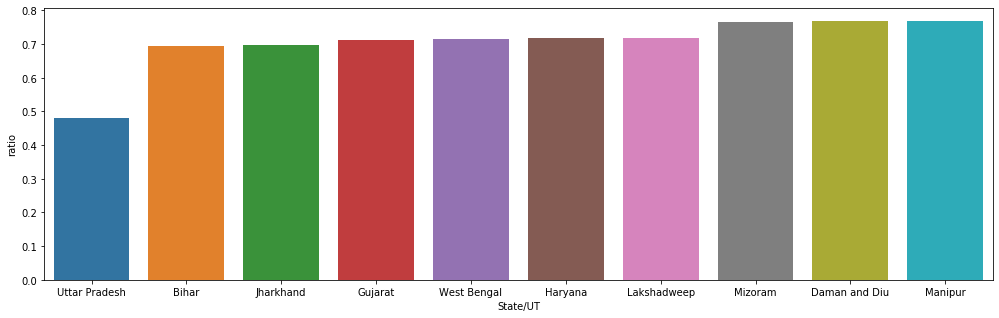

In [11]:
plt.figure(figsize=(17,5))
sns.barplot(x='State/UT',y='ratio',data=police.head(10))